<a href="https://colab.research.google.com/github/Maria-syss/09-week/blob/main/Taller_Semana_09_Funciones_de_Tiempo_y_Jerarqu%C3%ADa_de_Fechas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TALLER 1 CORTE 2**

##**1. Introducción**
###Breve descripción del propósito del manual
* Ofrecer una guía sobre la manipulación de datos temporales en el contexto de la ciencia de datos, utilizando herramientas comunes como Python y la biblioteca.

###Importancia de la gestión de fechas y tiempos en ciencia de datos
* La gestión de fechas y tiempos es crucial para obtener información significativa y tomar decisiones informadas y fundamental en el desarrollo de software y la administración de bases de datos.
* Posibilita realizar tareas como: seguimiento de eventos a lo largo del tiempo, realización de predicciones basadas en tendencias temporales y análisis de series temporales para detectar patrones o anomalías.

##**2. Funciones de Tiempo**

###¿Qué son las funciones de tiempo y su utilidad en la manipulación de datos temporales?
* Las funciones de tiempo son herramientas proporcionadas por bibliotecas como pandas en Python que permiten manejar, manipular y analizar datos temporales de manera eficiente Y trabajar con fechas y horas para extraer información, realizar análisis y transformaciones, y organizar datos en función del tiempo.
* Son esenciales para diversos tipos de análisis y tareas en ciencia de datos, ya que el tiempo es un factor clave en muchos conjuntos de datos (Análisis de Series Temporales, Pronósticos y Predicciones y Filtrar y Subconjuntar Datos).





##**Caso práctico**

In [ ]:
import pandas as pd

# Crear un rango de fechas
fechas = pd.date_range(start='2022', periods=15, freq='D')
print(fechas)

# Extraer elementos
df = pd.DataFrame({'fechas': fechas})
df['año'] = df['fechas'].dt.year
df['mes'] = df['fechas'].dt.month
df['día'] = df['fechas'].dt.day
df['día_semana'] = df['fechas'].dt.day_name()

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15'],
              dtype='datetime64[ns]', freq='D')


##**Actividad**

In [ ]:
import pandas as pd
fechas = pd.date_range(start='2022-07-01', periods=20, freq='D')
df = pd.DataFrame({'fecha': fechas})
df['días desde'] = (df['fecha'] - pd.to_datetime('2022-07-12')).dt.days
df_filtrado = df[df['fecha'] > '2022-07-12']
print("Días desde 2022-07-12:")
print(df)

print("\nFechas después del 12 de julio:")
print(df_filtrado)

Días desde 2022-07-12:
        fecha  días desde
0  2022-07-01         -11
1  2022-07-02         -10
2  2022-07-03          -9
3  2022-07-04          -8
4  2022-07-05          -7
5  2022-07-06          -6
6  2022-07-07          -5
7  2022-07-08          -4
8  2022-07-09          -3
9  2022-07-10          -2
10 2022-07-11          -1
11 2022-07-12           0
12 2022-07-13           1
13 2022-07-14           2
14 2022-07-15           3
15 2022-07-16           4
16 2022-07-17           5
17 2022-07-18           6
18 2022-07-19           7
19 2022-07-20           8

Fechas después del 12 de julio:
        fecha  días desde
12 2022-07-13           1
13 2022-07-14           2
14 2022-07-15           3
15 2022-07-16           4
16 2022-07-17           5
17 2022-07-18           6
18 2022-07-19           7
19 2022-07-20           8


##**Explicación actividad**
####**1. Generación de las fechas**
Se creó un rango de 20 fechas consecutivas a partir del 1 de julio de 2022.
####**2. Cálculo de días desde una fecha específica**
Se definió como referencia el 12 de julio de 2022, y se calculó la cantidad de días que han pasado desde esa fecha para cada fila.
Si el resultado es negativo, la fecha es anterior al 12 de julio.

*   Si el resultado es negativo, la fecha es anterior al 12 de julio.
*   Si es 0, es el mismo día.
* Si es positivo, la fecha es después.

####**3. Filtrado por fechas posteriores**
Se aplicó un filtro para obtener únicamente las fechas posteriores al 12 de julio de 2022.

##**3. Jerarquía de Fechas**

###¿Cómo organizar y agrupar datos por componentes temporales (año, trimestre, mes, semana, etc.)?
* Proceso fundamental cuando se trabaja con series temporales. Este tipo de agrupación ayuda a identificar patrones, tendencias y realizar análisis comparativos. Teniendo en cuenta el manejo de fechas faltantes, intervalos irregulares y frecuencia personalizada)

##**Caso práctico**

In [ ]:
import numpy as np

df = pd.DataFrame({
    'fecha': pd.date_range(start='2023-01-01', periods=90, freq='D'),
    'ventas': np.random.randint(100, 1000, size=90)
})

df['mes'] = df['fecha'].dt.to_period('M')
ventas_mensuales = df.groupby('mes')['ventas'].sum()
ventas_mensuales

##**Actividad**

Estadísticas por trimestre:
                      promedio  minimo  maximo
trimestre                                     
2022 - Trimestre 1  568.468354     106     969
2022 - Trimestre 2  730.000000     306     993


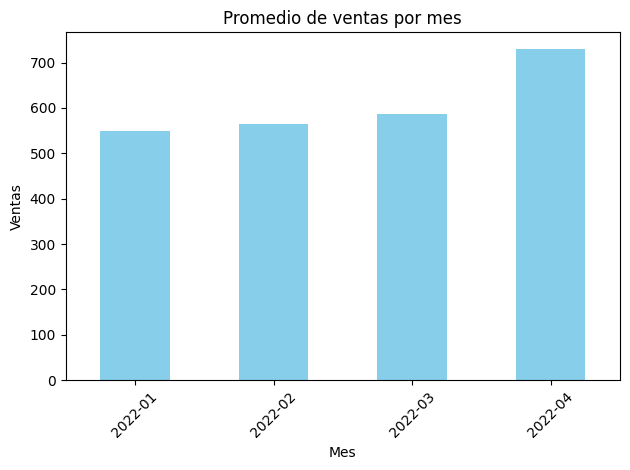

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'fecha': pd.date_range(start='2022-01-12', periods=90, freq='D'),
    'ventas': np.random.randint(100, 1000, size=90)
})

df['trimestre'] = df['fecha'].dt.to_period('Q').astype(str)
df['trimestre'] = df['trimestre'].apply(lambda x: f"{x[:4]} - Trimestre {x[-1]}")
estadisticas = df.groupby('trimestre')['ventas'].agg(promedio='mean', minimo='min', maximo='max')

print("Estadísticas por trimestre:")
print(estadisticas)

df['mes'] = df['fecha'].dt.to_period('M')
promedio_mensual = df.groupby('mes')['ventas'].mean()

promedio_mensual.plot(kind='bar', color='skyblue')
plt.title("Promedio de ventas por mes")
plt.xlabel("Mes")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**Explicación actividad**
####**1. Agrupación por trimestre con estadísticas descriptivas**
* Generé un conjunto de datos con fechas diarias y valores de ventas aleatorios.
* Luego transformé la columna de fechas para agrupar por trimestres.
Después, establecí un valor exacto (2022 - Trimestre 1).
* Finalmente agrupé los datos por trimestre y calculé tres estadísticas: promedio, mínimo y máximo.

**Permitiendome ver como variaron las ventas en cada trimestre.**

####**2. Visualización del promedio mensual de ventas**
* Convertí la columa de fechas para obtener **mes**.
* Calculé el promedio de ventas por mes.
* Finalmente, hice una gráfica de barras para visualizar los resultados.

##**Conclusión**

###¿Qué aprendiste?

Aprendí a trabajar con fechas, poder agrupar datos por periodos como los que se trabajaron en las actividades: meses y trimestres. Tambien a calcular estadisticas como promedio y a visualizar los datos para poder interpretarlos de manera mas facil y clara.

###¿En qué escenarios reales se aplicaría lo aprendido?

Yo creo que se podria aplicar para:
1. analizar las ventas mensuales o trimestrales de una empresa.
2. Estudiar y analizar el comportamiento de los datos en sectores como el comercio o transporte.

###¿Qué dificultades encontraste y cómo las resolviste?

Al momento de querer cmabiar el nombre de algunas columnas o que se vieran mejor ciertas columnas, tambien cuando queria cambiar las fechas de referencia o el periodo me equivocaba o enredaba. Finalmente me devolia, miraba como estaba y cual otra podia ser la parte a corregir, si no podia encontrarla, le subia el codigo a una IA para que me ayudara a solucionar.